<h1>Can a large scale dewatering project replace a pumping test?</h1>
<h2>A show case of the Tim groundwater familiy by an assessment of the Vlaketunnel dewatering in 2011.</h2>

The primary goal of this notebook is to illustrate the use of the Tim groundwater family, especially the use of QGIS-Tim, TimML and data available on the internet.

This notebook is presented during a workshop at the NHV Spring meeting on April 13, 2023.

Prepared by Mark Bakker (TU Delft) and Hendrik Meuwese (Waterboard Scheldestromen).
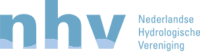

## Some Python imports

In [1]:
# import general packages
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# install timml if it is not installed already
try:
    import timml as tml
except:
    !pip install timml
    import timml as tml

# import specific functions for this notebook. not used now to make notebook run on colab
# import vlaketunnel_functions as vlake_func

# some plotting parameters
plt.rcParams["figure.figsize"] = (12, 4) # set default figure size
plt.rcParams["contour.negative_linestyle"] = 'solid' # set default line style
plt.rcParams["figure.autolayout"] = True # same at tight_layout after every plot

# This is TimML in Python

A short example of TimML in the Python interface.

The code cell below is copied from the example notebook (https://github.com/mbakker7/timml/blob/master/notebooks/timml_notebook0_sol.ipynb). It creates a groundwater model with uniform flow and an extraction of 400 m$^3$/day by a well.

Do you want to know more about Tim? For Dutch people, TKI TIM is active now: https://publicwiki.deltares.nl/display/TKIP/DEL156+TKI+TIM

Number of elements, Number of equations: 3 , 1
...
solution complete
.


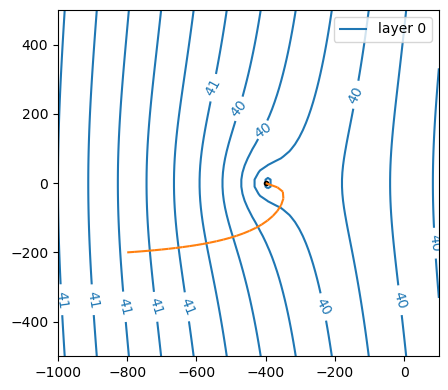

In [2]:
ml = tml.ModelMaq(kaq=10, z=[10, 0])
rf = tml.Constant(ml, xr=-1000, yr=0, hr=41)
uf = tml.Uflow(ml, slope=0.001, angle=0)
w = tml.Well(ml, xw=-400, yw=0, Qw=50., rw=0.2)
ml.solve()

ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1), ) #figsize=(6, 6))
ml.tracelines(-800 * np.ones(1), -200 * np.ones(1), np.zeros(1), hstepmax=20, color='C1')

The example is a simple synthetic model. 
The construction of more complicated TimML models is facilitated by a QGIS plus-in. We will use QGIS to create a TimML model later in this Notebook.

QGIS-TIM models may be exported to Python scripts and imported in a notebook. Some pre-processing of model input and observations is done in a separate notebook.

First we give an overview of the modeling case.

# Short overview of the case and model input


## Why was dewatering started?
The eastern part of the Vlaketunnel (A58 highway in province Zeeland) lifted up by 10-15 cm on November 12, 2010. The tunnel was closed immediately. Dumper trucks delivered sand to try to stabilize the tunnel. 
A large-scale dewatering was started on November 26, 2010.

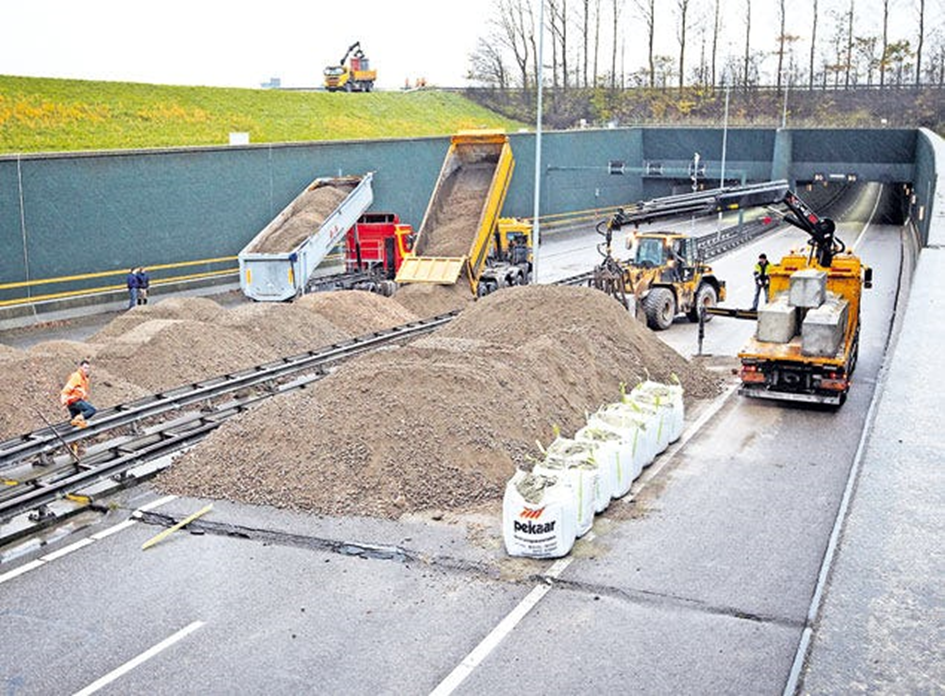

## Boundary conditions

### GeoTop
Lithology according to BRO GeoTop v1.5

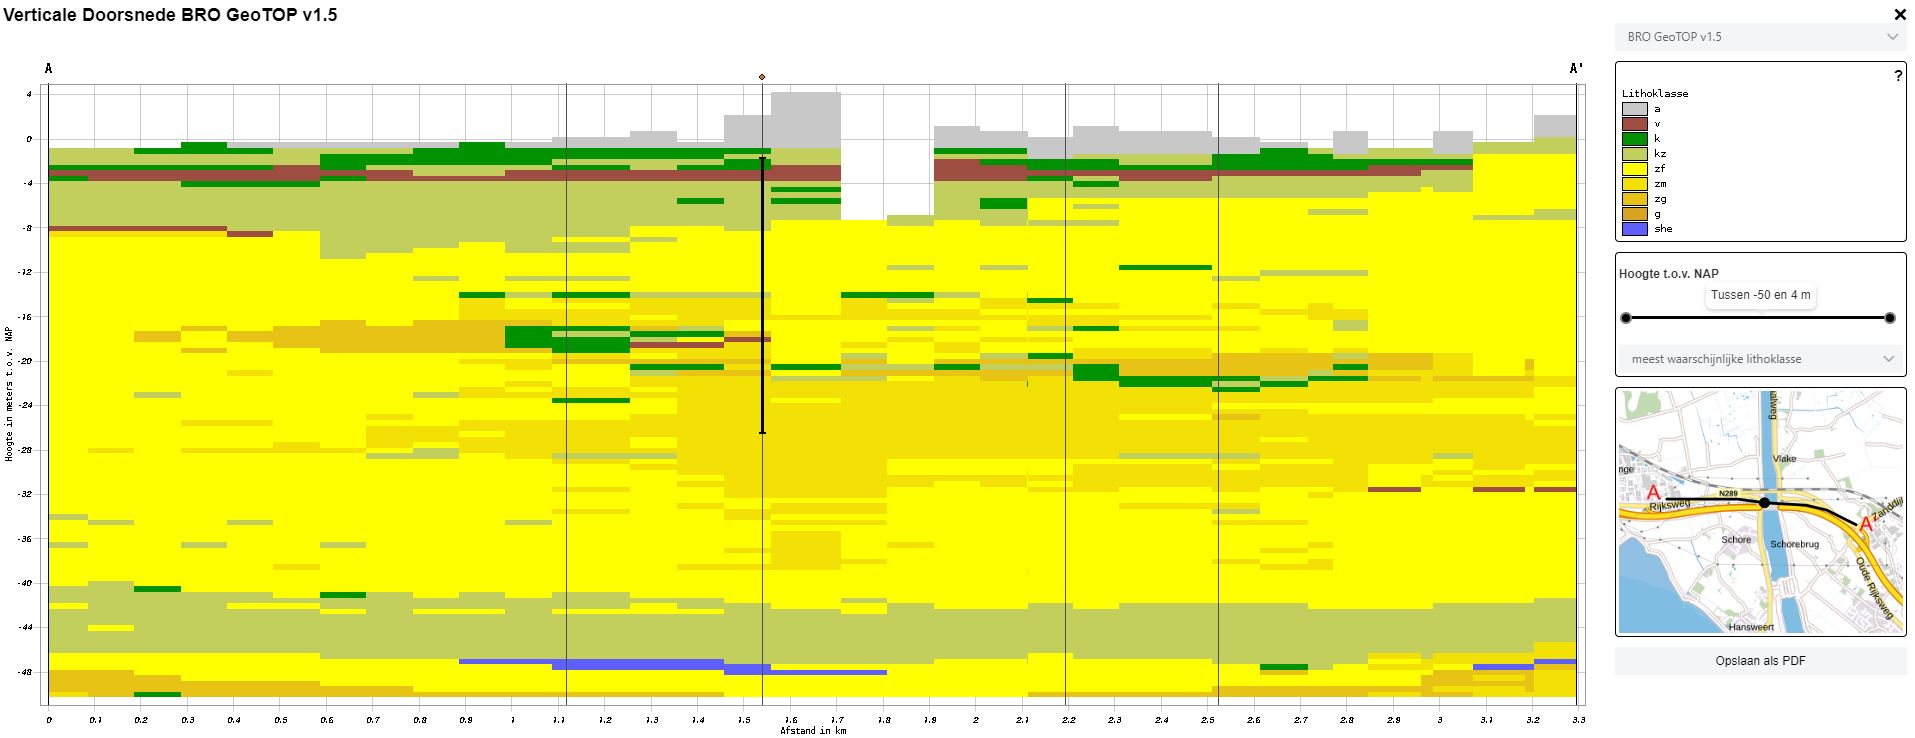

### Layer composition

| top (m NAP)  | bottom (m NAP)   |   hydrogeology | dewatering    |  channel  | kh  |
|--- |--- |--- |--- |--- | --- |
|   -1 |  -7  | semi-confining toplayer   |    |   yes | c=1000  |
|   -7 |  -15  | upper part aquifer   |   yes |   yes |  kh=5  |
|   -15 |  -30 | middle part aquifer   |    |    | kh=15  |
|   -30 |  -40 | lower part aquifer   |    |    | kh=5  |

### Discharge

Actual discharges are: 325 m$^3$/hour in the eastern part and 75 m$^3$/hour in the western part.

In [3]:
q_east_total = 325 * 24 # m^3/d
q_east_nr_wells = 4
print(f'EAST discharge per well = {q_east_total/q_east_nr_wells} m3/day')

q_west_total = 75 * 24 # m^3/d
q_west_nr_wells = 2
print(f'WEST discharge per well = {q_west_total/q_west_nr_wells} m3/day')

EAST discharge per well = 1950.0 m3/day
WEST discharge per well = 900.0 m3/day


## Observed drawdowns, relative to center of eastern dewatering site

Major dewatering is on eastern shore, see observed drawdown of 8 m at x=0.


Red color for observations west of Kanaal door Zuid-Beveland, maroon color for eastern shore. Mind the difference of drawdown near $x=1700$ on both shores. 

In [4]:
# import on your laptop
# import pickle
# with open(r'data/df_dh.pkl', 'rb') as f:
#    df_dh = pickle.load(f)

# binder does not support pickle, we use text import
data_as_string = StringIO("""name;x;y;screen_top;tube_nr;dh_obs;ha;va;color;r
eastern_tunnel;59313.0;387345.0;-10.00;1.0;-8.000000;left;top;maroon;0.000000
pb6;58774.0;386980.0;-10.00;1.0;-2.000000;left;top;r;650.957756
B48F0233-001;58803.0;388144.0;-6.45;1.0;-0.549122;left;top;r;947.892926
B48F0233-002;58803.0;388144.0;-8.81;2.0;-0.307027;left;bottom;r;947.892926
B48F0233-003;58803.0;388144.0;-14.89;3.0;-0.338581;right;top;r;947.892926
B48F0203-002;59400.0;389050.0;-8.60;2.0;-0.821750;left;bottom;maroon;1707.218205
B48F0203-003;59400.0;389050.0;-14.40;3.0;-0.767000;right;top;maroon;1707.218205
B48F0232-002;58615.0;389021.0;-9.57;2.0;-0.029118;left;bottom;r;1815.538488
B48F0232-003;58615.0;389021.0;-14.61;3.0;-0.026286;right;top;r;1815.538488
B48F0231-002;57381.0;389003.0;-10.58;2.0;0.000676;left;bottom;r;2545.896306
B48F0231-003;57381.0;389003.0;-14.27;3.0;-0.016892;right;top;r;2545.896306""")
df_dh = pd.read_table(data_as_string, header=0, sep=";", index_col=0)

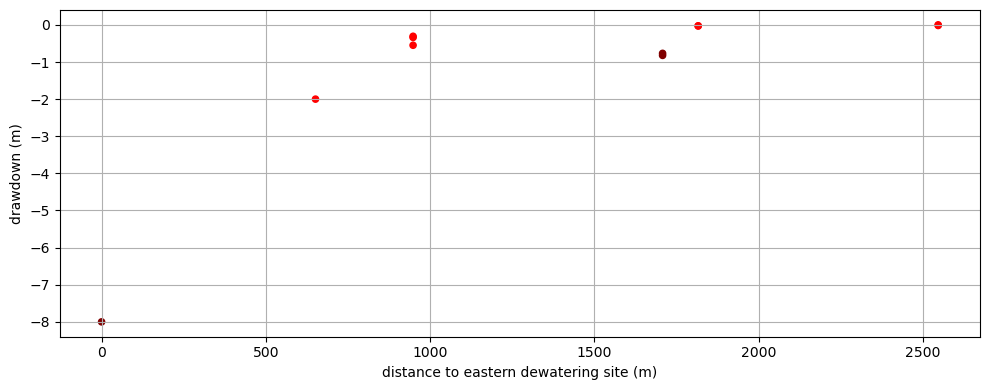

In [5]:
df_dh.plot.scatter(x='r', y='dh_obs', c='color', xlabel='distance to eastern dewatering site (m)', ylabel='drawdown (m)', figsize=(10,4), grid=True);

# Create TimML model using QGIS-Tim

QGIS-Tim is a graphical user interface in QGIS for TimML (steady-state) and TTim (transient) models (https://deltares.gitlab.io/imod/qgis-tim/index.html). QGIS-Tim can export a Python file with the model input. 

## Model set-up
Because of the limited time during this workshop, the QGIS-Tim is prepared. The result is posted in the code cell below.

In [6]:
#Video.from_file("data/screen_capture_qgis_tim_compressed.mp4", width=320, height=320)
#Video.from_file("data/screen_capture_qgis_tim_full.mp4", width=320, height=320)

## Functions to create the model and display the model results
These are commonly stored in a separate Python file. They are included here to make it easier to run the notebook on google colab.

In [7]:
def create_model(kaq=[0.1, 5.0, 15.0, 5.0], c=[1000.0, 2.0, 2.0, 2.0],hstar=0, c_channel_bot=30,
                do_plot=True, df_dh=None):
    """
    Create a TimML model for Vlaketunnel case

    Parameters
    ----------
    kaq : list, optional
        Kh of aquifers. The default is [0.1, 5.0, 15.0, 5.0].
    c : list, optional
        c of aquitards. The default is [1000.0, 2.0, 2.0, 2.0].
    hstar : float, optional
        Top boundary condition of semi-confining toplayer. The default is 0.
    c_channel_bot : float, optional
        resistance of Kanaal door Zuid-Beveland. The default is 30.
    do_plot : boolean, optional
        Plot results? The default is True.
    df_dh: pd.DataFrame, optional
        Information about observed drawdowns, required for plotting. The default is None.

    Returns
    -------
    ml : timml model
        The model

    """
    
    # create model
    ml = tml.ModelMaq(
        kaq=kaq,
        z=[1.0, -3.0, -7.0, -7.0, -14.0, -14.0, -30.0, -30.0, -40.0],
        c=c,
        topboundary="semi",
        npor=[None, None, None, None, None, None, None, None],
        hstar=hstar,
    )

    # add dewatering
    dewatering_east_xys = [[59224, 387382], [59359, 387375], [59360, 387311], [59234, 387298], ]
    q_east_total = 325*24
    
    q_west_total = 75*24
    dewatering_west_xys = [[58781, 387375], [58785, 387307],]
    
    for dewatering_xys, q_total in zip([dewatering_east_xys, dewatering_west_xys], [q_east_total, q_west_total]):
        # loop over both dewatering locations
        for dewatering_xy in dewatering_xys:
            # loop over the modelled wells, in pratice a lot of more wells are used. Current model has focus on regional effect, therefore limited number of wells are considered sufficient
            dewatering_east = tml.Well(
                xw=dewatering_xy[0],
                yw=dewatering_xy[1],
                Qw=q_total/len(dewatering_xys),
                rw=0.5,
                res=1.0,
                layers=1,
                label=None,
                model=ml,
            )

    c_channel = ml.aq.c.copy()
    c_channel[0] = c_channel_bot

    channel_0 = tml.PolygonInhomMaq(
        kaq=ml.aq.kaq,
        z=ml.aq.z,
        c=c_channel,
        topboundary="semi",
        npor=[None, None, None, None, None, None, None, None],
        hstar=0.0,
        # compared to QGIS-Tim export the channel is extended to the north in order to cover the northern observation wells better
        xy= [ [58921, 390500], [59065, 390500], [59110, 387996], [59146, 387447], [59263, 386809], [59317, 386260], [59110, 386251], [58966, 386863], [58921, 388617], ],
        order=4,
        ndeg=6,
        model=ml,
    )
    ml.solve()
    
    if do_plot and (df_dh is not None):
        plot_model_results(ml, df_dh)
                 
    return ml

def plot_model_input(ml):
    """
    Plot model input in schematic section

    Parameters
    ----------
    ml : timml Model
        The model

    Returns
    -------
    None.

    """
    # some plotting constants
    xmin=-1
    xchannel=-0.25
    xhinter=-0.2
    xmax=1
    zaqmid = np.mean([ml.aq.zaqtop,ml.aq.zaqbot],axis=0)

    # plot layers
    plt.hlines(y=ml.aq.zlltop,xmin=xmin,xmax=xmax,color='darkgray')
    plt.hlines(y=ml.aq.zaqbot,xmin=xmin,xmax=xmax,color='darkgray')

    # plot kh
    for kh, z in zip(ml.aq.kaq, zaqmid):
        plt.annotate(f'kh={kh:0.1f}m/d',(0,z),ha='center')
    # plot c
    for c, z in zip(ml.aq.c, ml.aq.zaqtop):
        plt.annotate(f'c={c:0.1f}d',(0.5,z),ha='center',va='center')
    # plot channel
    plt.plot([xmin,xchannel],[ml.aq.inhomlist[0].hstar]*2,color='blue')
    plt.annotate(f'h_ch={ml.aq.inhomlist[0].hstar:0.1f}',(xchannel,ml.aq.inhomlist[0].hstar),ha='right',va='bottom')
    plt.annotate(f'c_ch={ml.aq.inhomlist[0].c[0]:0.1f}',(xchannel,ml.aq.zaqtop[0]),ha='right',va='bottom')

    # plot hinterland
    plt.plot([xhinter,xmax],[ml.aq.hstar]*2,color='darkblue')
    plt.annotate(f'h_polder={ml.aq.hstar:0.1f}',(xhinter,ml.aq.hstar),ha='left',va='bottom')

    plt.xlim([xmin, xmax])


def plot_model_results(ml, df_dh):
    """
    Plot results of TimML model of Vlaketunnel case

    Parameters
    ----------
    ml : timml Model, 
        The model.
    df_dh : pd.DataFrame 
        Observed drawdowns

    Returns
    -------
    None.

    """
    
    # contour plot
    plt.subplot(221)
    ml.contour(win=[57000, 60000, 386900, 389100], ngr=50, layers=1,
               levels=[-5,-2,-1,-0.5,-0.1], labels=True, decimals=2, legend=False, newfig=False);
    plt.scatter(df_dh.x, df_dh.y, 20, c=df_dh.color)
    for index, row in df_dh.iterrows():
        plt.annotate(f'{row.dh_obs:0.2f}', (row.x, row.y),ha=row.ha,va=row.va)
    plt.title('contours in layer 1');
    
    # plot model input
    plt.subplot(222)
    plot_model_input(ml)
    
    for plotid in (223, 224):
        plt.subplot(plotid)
        if plotid == 223:
            # first plot, get model results
            df_dh['ml_layer'] = None
            df_dh['dh_calc'] = None
            for index, row in df_dh.iterrows():
                df_dh.loc[index,'ml_layer'] = np.where(ml.aq.zaqtop > row.screen_top)[0][-1]
                df_dh.loc[index,'dh_calc'] = ml.headalongline(row.x, row.y, row.ml_layer)[0][0]
            # plot all model results
            plot_df = df_dh
        else:
            # second plot, only plot outside dewatering area
            plot_df = df_dh.loc[df_dh.r > 100]

        plt.scatter(plot_df.r, plot_df.dh_obs, 50, c=plot_df.color, alpha=0.3, label='observed')
        plt.scatter(plot_df.r, plot_df.dh_calc, 40, marker='+', label='modelled')
        plt.legend()
        plt.title('heads from screened modellayer');
        plt.grid()

## The model is now a function

The Python script exported by QGIS-Tim is relatively long, because each well is stored separately. The code is included in the function `create_model`. The function builds the same model as created in QGIS-Tim. Some of the model input can be changed through the input arguments of the function. When no arguments are given, the model uses the default parameters from QGIS-Tim. The only change is that for the dewatering, all heads are computed with respect to the situation before the start of dewatering. Hence, waterlevel in the canal and polders is specified as 0.

The mode is built and solved as follows:

In [8]:
ml = create_model(do_plot=False) # create and solve model, but don't plot results

Number of elements, Number of equations: 26 , 360
..........................
solution complete


The aquifer parameters of the model may be visualized with the `plot_model_input` function.

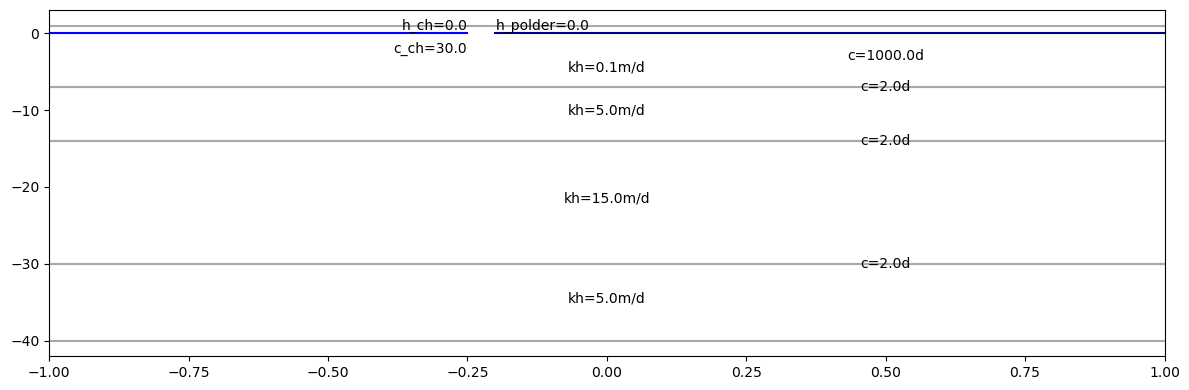

In [9]:
plot_model_input(ml)

A contour plot of the computed head changed caused by the dewatering are shown below. The figure also included the measured head changes (note that the head change is the opposite of the drawdown). 

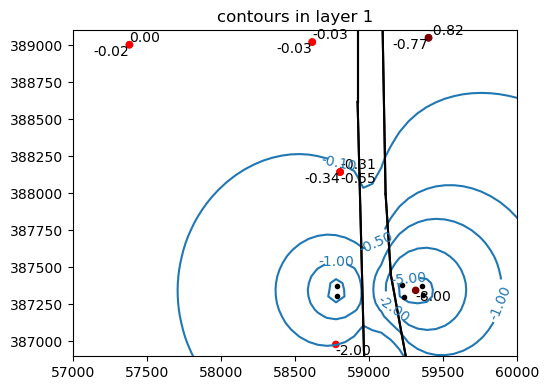

In [10]:
ml.contour(win=[57000, 60000, 386900, 389100], ngr=50, layers=1,
               levels=[-5,-2,-1,-0.5,-0.1], labels=True, decimals=2, legend=False, newfig=False);
plt.scatter(df_dh.x, df_dh.y, 20, c=df_dh.color)
for index, row in df_dh.iterrows():
    plt.annotate(f'{row.dh_obs:0.2f}', (row.x, row.y),ha=row.ha,va=row.va)
plt.title('contours in layer 1');

Both plots, and sections over the observation locations are combined in one plotting function: `plot_model_results`.

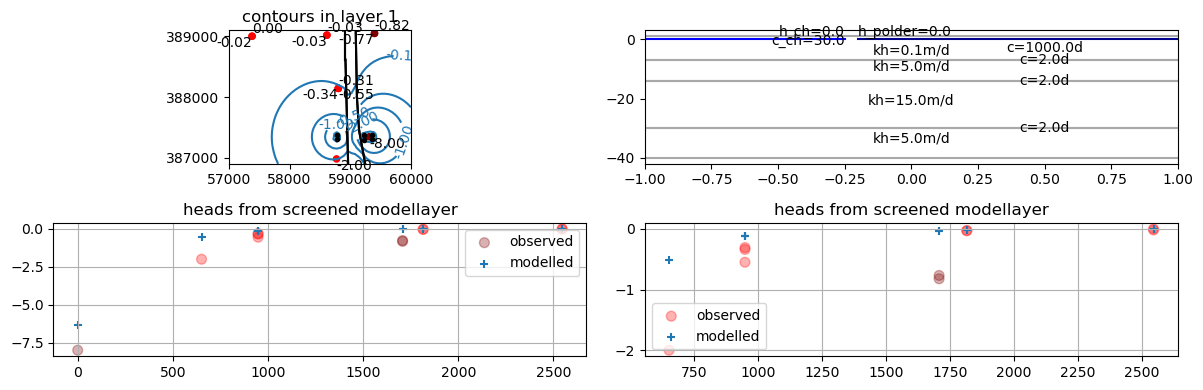

In [11]:
plot_model_results(ml, df_dh)

## Next: vary the aquifer parameters to better match the observed head changes

The calculated head change is (far) larger than the observed head change. Different aquifer parameters are specified as input to the `create_model` function. The function automtically calls the plot function by default.

### First attempt: larger bottom resistance of Kanaal door Zuid-Beveland

Number of elements, Number of equations: 26 , 360
..........................
solution complete


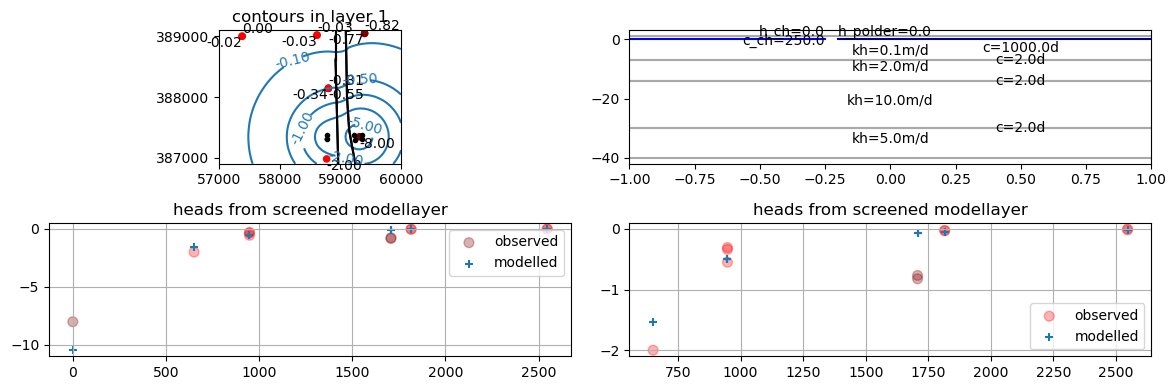

In [12]:
ml = create_model(kaq=[0.1, 2.0, 10.0, 5.0], c_channel_bot=250, df_dh=df_dh)

### Second attempt: higher resistance of semi-confining top layer below polders

Number of elements, Number of equations: 26 , 360
..........................
solution complete


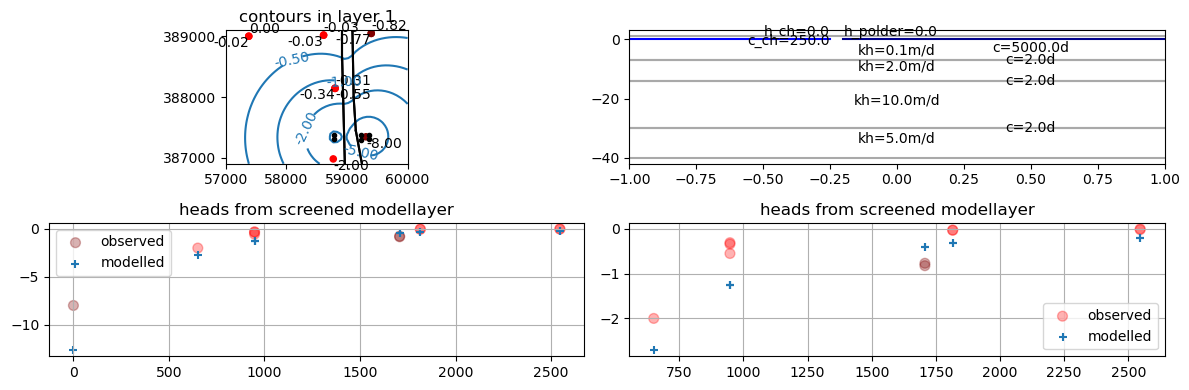

In [13]:
ml = create_model(kaq=[0.1, 2.0, 10.0, 5.0], c_channel_bot=250, c=[5000.0, 2.0, 2.0, 2.0], df_dh=df_dh)

# Up to you!

Which model input gives the best representation of the observation?

Is there one best solution? Is this relatively simple schematization a reasonable representation?